<a href="https://colab.research.google.com/github/harnalashok/CatEncodersFamily/blob/main/pulsar_pca_xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catencfamily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.6/228.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 58.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 77.4 MB/s eta 0:00:00
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395106 sha256=f183c47cba9d1f80da2645870280587983d1cf41939c07fa546b307fc8183587
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df6

In [39]:
# 1.0 Call libraries
import pandas as pd
import numpy as np


# 1.01
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


# 1.02
import matplotlib.pyplot as plt
import seaborn as sns


# 1.03
import xgboost as xgb


# 1.04
from catencfamily.encoders import CatEncodersFamily
from catencfamily import utils

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [46]:
# Read Data
data = pd.read_csv("https://raw.githubusercontent.com/harnalashok/CatEncodersFamily/main/datasets/pulsar_data_train.csv")

In [47]:
data.head(3)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0


In [48]:
y = data.pop("target_class")

In [49]:
# Imbalanced data
y.value_counts(normalize = True)

0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

In [50]:
# Check nulls
data.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
dtype: int64

In [51]:
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')

In [52]:
# Rename columns with spaces:
data = data.rename(columns = { " Mean of the integrated profile" : "Mean_integrated_profile",
                               " Standard deviation of the integrated profile" : "Std_dev_integrated_profile",
                               " Excess kurtosis of the integrated profile" : "Excesskurtosis_integrated_profile",
                               " Skewness of the integrated profile" : "Skewness_integrated_profile",
                               " Mean of the DM-SNR curve" : "Mean_DM_SNR_curve",
                               " Standard deviation of the DM-SNR curve" : "Std_dev_DM_SNR_curve",
                               " Excess kurtosis of the DM-SNR curve" : "ExcessKurtosis_DM_SNR_curve",
                               " Skewness of the DM-SNR curve" : "SkewnessDM_SNR_curve"
                             }
                   
                   )    


In [53]:
data.head()

,Mean_integrated_profile,Std_dev_integrated_profile,Excesskurtosis_integrated_profile,Skewness_integrated_profile,Mean_DM_SNR_curve,Std_dev_DM_SNR_curve,ExcessKurtosis_DM_SNR_curve,SkewnessDM_SNR_curve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128


In [54]:

# Discretise all features of data. And also split dataset.
# into train/test
orig_train, orig_test, train_binned, test_binned  = utils.generateSklearnData(data,
                                                                              y,
                                                                              bins = 30,
                                                                              test_size = 0.1,
                                                                              genColName = False  # Keep orig col names
                                                                              )

In [55]:
# Check  original data:

orig_train.head(3)
orig_test.head(3)
orig_train.shape

,Mean_integrated_profile,Std_dev_integrated_profile,Excesskurtosis_integrated_profile,Skewness_integrated_profile,Mean_DM_SNR_curve,Std_dev_DM_SNR_curve,ExcessKurtosis_DM_SNR_curve,SkewnessDM_SNR_curve,target
7332,78.460938,37.632246,0.761066,2.516426,2.241639,17.166000,8.768599,85.693532,0.0
7416,137.500000,37.165172,NaN,1.245371,3.239130,25.127128,8.179860,68.019792,0.0
12151,104.585938,48.763704,1.217617,1.745403,43.056856,68.276894,1.392848,0.564216,0.0


,Mean_integrated_profile,Std_dev_integrated_profile,Excesskurtosis_integrated_profile,Skewness_integrated_profile,Mean_DM_SNR_curve,Std_dev_DM_SNR_curve,ExcessKurtosis_DM_SNR_curve,SkewnessDM_SNR_curve,target
9543,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
10787,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2167,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0


(11276, 9)

In [56]:
# 
si = SimpleImputer(strategy = 'median')
orig_train[:] = si.fit_transform(orig_train)
orig_test[:] = si.transform(orig_test)

In [57]:
# Check discretised features
# train/test in binned data and original 
# split data have the same row-indicies:

train_binned.head(3)
test_binned.head(3)
train_binned.shape

,Mean_integrated_profile,Std_dev_integrated_profile,Excesskurtosis_integrated_profile,Skewness_integrated_profile,Mean_DM_SNR_curve,Std_dev_DM_SNR_curve,ExcessKurtosis_DM_SNR_curve,SkewnessDM_SNR_curve,target
7332,412,86,128,162,201,243,2810,323,0.0
7416,422,86,NaN,162,201,246,2810,322,0.0
12151,417,811,1210,162,206,2418,284,321,0.0


,Mean_integrated_profile,Std_dev_integrated_profile,Excesskurtosis_integrated_profile,Skewness_integrated_profile,Mean_DM_SNR_curve,Std_dev_DM_SNR_curve,ExcessKurtosis_DM_SNR_curve,SkewnessDM_SNR_curve,target
9543,419,811,127,161,201,244,289,322,0.0
10787,412,86,128,163,201,243,2810,323,0.0
2167,421,813,126,161,201,245,2810,322,0.0


(11276, 9)

In [58]:
si = SimpleImputer(strategy = 'most_frequent')
train_binned[:] = si.fit_transform(train_binned)
test_binned[:] = si.transform(test_binned)

In [59]:
# Pop out targets
ytr = train_binned.pop('target')
yte = test_binned.pop("target")

In [60]:
## Developing models
# Which are our cat columns
# We will consider few columns
# Ref: https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization

cat_cols = list(train_binned.columns)
cat_cols
len(cat_cols)  # 5


# Keep interacting columns, same
# as cat columns:
interactingCatCols = cat_cols

['Mean_integrated_profile',
 'Std_dev_integrated_profile',
 'Excesskurtosis_integrated_profile',
 'Skewness_integrated_profile',
 'Mean_DM_SNR_curve',
 'Std_dev_DM_SNR_curve',
 'ExcessKurtosis_DM_SNR_curve',
 'SkewnessDM_SNR_curve']

8

In [94]:
# Instantiate CustomTransformer class:
ct = CatEncodersFamily(
                       cMeasures=[1,1,1,1,None,0,0],  # This is better than all 1s
                       )

# Fit it:
ct.fit(train_binned, cat_cols, interactingCatCols) 


Record set no is 1  
Set of records is:  [('Mean_integrated_profile', 'Std_dev_integrated_profile', [1, 1, 1, 1, None, 0, 0]), ('Mean_integrated_profile', 'Excesskurtosis_integrated_profile', [1, 1, 1, 1, None, 0, 0]), ('Mean_integrated_profile', 'Skewness_integrated_profile', [1, 1, 1, 1, None, 0, 0]), ('Mean_integrated_profile', 'Mean_DM_SNR_curve', [1, 1, 1, 1, None, 0, 0]), ('Mean_integrated_profile', 'Std_dev_DM_SNR_curve', [1, 1, 1, 1, None, 0, 0]), ('Mean_integrated_profile', 'ExcessKurtosis_DM_SNR_curve', [1, 1, 1, 1, None, 0, 0]), ('Mean_integrated_profile', 'SkewnessDM_SNR_curve', [1, 1, 1, 1, None, 0, 0]), ('Mean_integrated_profile', 'Mean_integrated_profile_p_Mean_DM_SNR_curve', [1, 1, 1, 1, None, 0, 0]), ('Mean_integrated_profile', 'Skewness_integrated_profile_p_Mean_DM_SNR_curve', [1, 1, 1, 1, None, 0, 0]), ('Mean_integrated_profile', 'Mean_integrated_profile_p_Std_dev_integrated_profile', [1, 1, 1, 1, None, 0, 0]), ('Mean_integrated_profile', 'Std_dev_integrated_profile_

CatEncodersFamily(cMeasures=[1, 1, 1, 1, None, 0, 0],
                  pathToStoreProgress=PosixPath('/content/allmodels/progress'))

In [95]:
# Transform test_binned data with only cat_cols
test_trans = ct.transform(test_binned)
test_trans.shape



====Reading all model-dicts from RAM


====All saved model-dicts read! Model files are intact!
====Total model-dict are:  1120
====Sending model loading progress to file: /content/allmodels/progress/load_stored_models.txt
When loading is in progress, open this file with notepad++ AND NOT with notepad


Current mem usage is: 8.784032 MB
Mem usage after dtype transformation is: 4.437088 MB


(1252, 876)

In [96]:
train_trans= ct.transform(train_binned)
train_trans.shape



====Reading all model-dicts from RAM


====All saved model-dicts read! Model files are intact!
====Total model-dict are:  1120
====Sending model loading progress to file: /content/allmodels/progress/load_stored_models.txt
When loading is in progress, open this file with notepad++ AND NOT with notepad


Current mem usage is: 79.112416 MB
Mem usage after dtype transformation is: 39.962144 MB


(11276, 876)

In [64]:
train_trans.head()
test_trans.head()

,Mean_integrated_profile,Std_dev_integrated_profile,Excesskurtosis_integrated_profile,Skewness_integrated_profile,Mean_DM_SNR_curve,Std_dev_DM_SNR_curve,ExcessKurtosis_DM_SNR_curve,SkewnessDM_SNR_curve,deg_Mean_integrated_profile_ck_Std_dev_integrated_profile,eig_Mean_integrated_profile_ck_Std_dev_integrated_profile,...,deg_SkewnessDM_SNR_curve_ck_Excesskurtosis_integrated_profile_p_Skewness_integrated_profile,eig_SkewnessDM_SNR_curve_ck_Excesskurtosis_integrated_profile_p_Skewness_integrated_profile,pr_SkewnessDM_SNR_curve_ck_Excesskurtosis_integrated_profile_p_Skewness_integrated_profile,clu_SkewnessDM_SNR_curve_ck_Excesskurtosis_integrated_profile_p_Skewness_integrated_profile,bet_SkewnessDM_SNR_curve_ck_Excesskurtosis_integrated_profile_p_Skewness_integrated_profile,deg_SkewnessDM_SNR_curve_ck_Std_dev_integrated_profile_p_ExcessKurtosis_DM_SNR_curve,eig_SkewnessDM_SNR_curve_ck_Std_dev_integrated_profile_p_ExcessKurtosis_DM_SNR_curve,pr_SkewnessDM_SNR_curve_ck_Std_dev_integrated_profile_p_ExcessKurtosis_DM_SNR_curve,clu_SkewnessDM_SNR_curve_ck_Std_dev_integrated_profile_p_ExcessKurtosis_DM_SNR_curve,bet_SkewnessDM_SNR_curve_ck_Std_dev_integrated_profile_p_ExcessKurtosis_DM_SNR_curve
0,412,86,128,162,201,243,2810,323,1.0,0.185046,...,1.0,0.197598,0.038708,0.91453,0.009921,0.148148,0.126599,0.029756,0.833333,0.000950
1,422,86,126,162,201,246,2810,322,1.0,0.185046,...,1.0,0.197598,0.038708,0.91453,0.009921,0.111111,0.101972,0.023699,1.000000,0.000000
2,417,811,1210,162,206,2418,284,321,1.0,0.185046,...,1.0,0.197598,0.038708,0.91453,0.009921,0.555556,0.438515,0.096081,0.314286,0.248517
3,421,812,126,161,201,245,289,322,1.0,0.185046,...,1.0,0.197598,0.038708,0.91453,0.009921,0.111111,0.101972,0.023699,1.000000,0.000000
4,417,86,127,162,201,242,2811,324,1.0,0.185046,...,1.0,0.197598,0.038708,0.91453,0.009921,0.222222,0.185351,0.041183,0.666667,0.005698


,Mean_integrated_profile,Std_dev_integrated_profile,Excesskurtosis_integrated_profile,Skewness_integrated_profile,Mean_DM_SNR_curve,Std_dev_DM_SNR_curve,ExcessKurtosis_DM_SNR_curve,SkewnessDM_SNR_curve,deg_Mean_integrated_profile_ck_Std_dev_integrated_profile,eig_Mean_integrated_profile_ck_Std_dev_integrated_profile,...,deg_SkewnessDM_SNR_curve_ck_Excesskurtosis_integrated_profile_p_Skewness_integrated_profile,eig_SkewnessDM_SNR_curve_ck_Excesskurtosis_integrated_profile_p_Skewness_integrated_profile,pr_SkewnessDM_SNR_curve_ck_Excesskurtosis_integrated_profile_p_Skewness_integrated_profile,clu_SkewnessDM_SNR_curve_ck_Excesskurtosis_integrated_profile_p_Skewness_integrated_profile,bet_SkewnessDM_SNR_curve_ck_Excesskurtosis_integrated_profile_p_Skewness_integrated_profile,deg_SkewnessDM_SNR_curve_ck_Std_dev_integrated_profile_p_ExcessKurtosis_DM_SNR_curve,eig_SkewnessDM_SNR_curve_ck_Std_dev_integrated_profile_p_ExcessKurtosis_DM_SNR_curve,pr_SkewnessDM_SNR_curve_ck_Std_dev_integrated_profile_p_ExcessKurtosis_DM_SNR_curve,clu_SkewnessDM_SNR_curve_ck_Std_dev_integrated_profile_p_ExcessKurtosis_DM_SNR_curve,bet_SkewnessDM_SNR_curve_ck_Std_dev_integrated_profile_p_ExcessKurtosis_DM_SNR_curve
0,419,811,127,161,201,244,289,322,1.0,0.185046,...,1.0,0.197598,0.038708,0.91453,0.009921,0.111111,0.101972,0.023699,1.000000,0.000000
1,412,86,128,163,201,243,2810,323,1.0,0.185046,...,1.0,0.197598,0.038708,0.91453,0.009921,0.148148,0.126599,0.029756,0.833333,0.000950
2,421,813,126,161,201,245,2810,322,1.0,0.185046,...,1.0,0.197598,0.038708,0.91453,0.009921,0.111111,0.101972,0.023699,1.000000,0.000000
3,425,811,125,161,203,243,285,321,1.0,0.185046,...,1.0,0.197598,0.038708,0.91453,0.009921,0.555556,0.438515,0.096081,0.314286,0.248517
4,413,86,128,163,201,244,2810,322,1.0,0.185046,...,1.0,0.197598,0.038708,0.91453,0.009921,0.111111,0.101972,0.023699,1.000000,0.000000


In [97]:
_= orig_train.pop('target')
_= orig_test.pop('target')

KeyError: ignored

In [98]:
pca = PCA(n_components = 2,  whiten= True, random_state= None)
ss= StandardScaler()
dx = pca.fit_transform(ss.fit_transform(orig_train))
dx.shape

(11276, 2)

In [99]:
da = train_trans.iloc[:,len(cat_cols):]#      [fe_1[:15]]   # 
da.isnull().sum().sum()  # If ot null perform imputation with SimpleImputer(strategy = 'median')

0

In [100]:
pca = PCA(n_components= 2, whiten= True, random_state = None)
ss = StandardScaler()
da = pca.fit_transform(ss.fit_transform(da))
da.shape

(11276, 2)

In [101]:
colnames = ["pc" + str(i) for i in range(dx.shape[1])]
dx = pd.DataFrame(dx, columns = colnames)
da = pd.DataFrame(da, columns = colnames)

<Axes: xlabel='pc0', ylabel='pc1'>

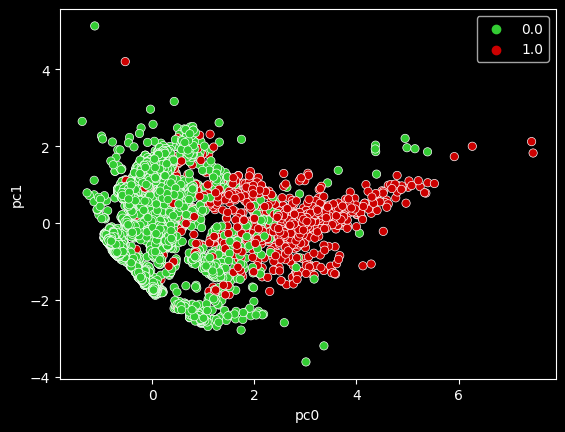

In [102]:
plt.style.use("dark_background")
sns.scatterplot(data = da, x= 'pc0', y = 'pc1', hue = ytr.values, palette = ["#33cc33", "#cc0000"])


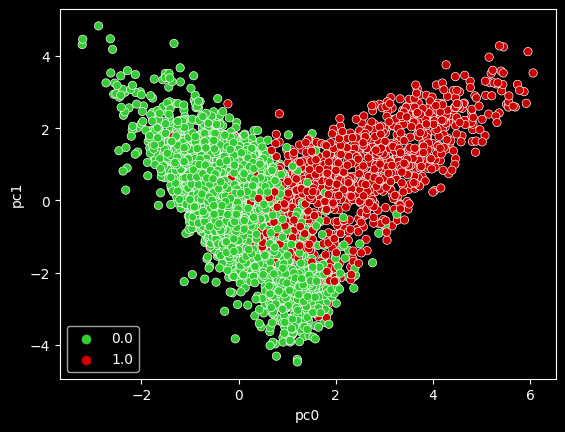

In [104]:
plt.style.use("dark_background")
ax = sns.scatterplot(data = dx, x= 'pc0', y = 'pc1', hue = ytr.values, palette = ["#33cc33", "#cc0000"])


In [74]:

evals_result= {}
model_orig = xgb.XGBClassifier( n_estimators= 200,
                           verbosity = 3,
                           eta = 0.06,      # 0.06
                           max_depth = 6,
                           subsample = 0.8,           # 0.8
                           evals_result = evals_result,
                           random_state = 70,
                           )


tr_X =   orig_train # orig_train#
test_X = orig_test  # orig_test
ytr = ytr #y_train
yte = yte #y_test


model_orig.fit(tr_X, ytr.values,                   # Xtr, ytr
          early_stopping_rounds = 50,   # 10% of n_estimators
          eval_set=[ (test_X, yte.values)],
          eval_metric = ['auc']    # binary classification problem
          )



[22:13:37] WARNING: ../src/learner.cc:767: 
Parameters: { "evals_result" } are not used.

[22:13:37] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[22:13:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-auc:0.94808
[22:13:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[1]	validation_0-auc:0.94774
[22:13:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-auc:0.95168
[22:13:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[3]	validation_0-auc:0.95206
[22:13:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[4]	validation_0-auc:0.95860
[22:13:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[5]	validation_0-auc:0.95830

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.06, eval_metric=None,
              evals_result={}, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None, ...)

In [105]:

evals_result= {}
model_trans = xgb.XGBClassifier( n_estimators= 200,
                           verbosity = 3,
                           eta = 0.06,      # 0.06
                           max_depth = 6,
                           subsample = 0.8,           # 0.8
                           evals_result = evals_result,
                           random_state = 70,
                           )


tr_X =   train_trans.iloc[:,len(cat_cols):]#  [fe_1[:15]]  #
test_X = test_trans.iloc[:,len(cat_cols):] # [fe_1[:15]]   #
ytr = ytr #y_train
yte = yte #y_test


model_trans.fit(tr_X, ytr.values,                   # Xtr, ytr
          early_stopping_rounds = 50,   # 10% of n_estimators
          eval_set=[ (test_X, yte.values)],
          eval_metric = ['auc']    # binary classification problem
          )



[22:44:07] WARNING: ../src/learner.cc:767: 
Parameters: { "evals_result" } are not used.

[22:44:07] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[22:44:09] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-auc:0.93784
[22:44:10] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[1]	validation_0-auc:0.94385
[22:44:12] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-auc:0.94806
[22:44:13] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[3]	validation_0-auc:0.94788
[22:44:14] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[4]	validation_0-auc:0.95641
[22:44:14] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[5]	validation_0-auc:0.95792

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.06, eval_metric=None,
              evals_result={}, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None, ...)

In [77]:
fe_1,fe_0 = utils.xgImptFeatures(model_trans,tr_X.columns)

Order of feature importance is by 'gain'


In [78]:
fe_1[:10]; len(fe_0)

['clu_Skewness_integrated_profile_ck_Std_dev_integrated_profile_p_Mean_DM_SNR_curve',
 'eig_Skewness_integrated_profile_ck_Mean_integrated_profile_p_Std_dev_integrated_profile',
 'pr_Excesskurtosis_integrated_profile_ck_Mean_DM_SNR_curve_p_Std_dev_DM_SNR_curve',
 'eig_Excesskurtosis_integrated_profile_ck_Mean_integrated_profile',
 'deg_Excesskurtosis_integrated_profile_ck_Mean_DM_SNR_curve_p_Std_dev_DM_SNR_curve',
 'eig_Excesskurtosis_integrated_profile_ck_Excesskurtosis_integrated_profile_p_Skewness_integrated_profile',
 'deg_Mean_DM_SNR_curve_ck_ExcessKurtosis_DM_SNR_curve',
 'eig_Excesskurtosis_integrated_profile_ck_Excesskurtosis_integrated_profile_p_Std_dev_DM_SNR_curve',
 'clu_Mean_integrated_profile_ck_Std_dev_integrated_profile_p_Excesskurtosis_integrated_profile',
 'deg_ExcessKurtosis_DM_SNR_curve_ck_Mean_integrated_profile_p_SkewnessDM_SNR_curve']

598